In [ ]:

#  AUTHOR: Reeshma Mantena 
#          Vamsi Krishna Muppala 
#          Vandana Priya Muppala 
#          Venkata Hemanth Srivillibhuth
            
#  FILENAME: Information_Retrieval_FinalCode.ipynb
#  SPECIFICATION: information retrieval system for images
#  FOR: CS 5364 Information Retrieval Section 001
# 
#Unziping the dataset from the Google drive
!unzip /content/drive/MyDrive/Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Training/Lemon/27_100.jpg  
  inflating: Dataset/Training/Lemon/280_100.jpg  
  inflating: Dataset/Training/Lemon/281_100.jpg  
  inflating: Dataset/Training/Lemon/282_100.jpg  
  inflating: Dataset/Training/Lemon/283_100.jpg  
  inflating: Dataset/Training/Lemon/284_100.jpg  
  inflating: Dataset/Training/Lemon/285_100.jpg  
  inflating: Dataset/Training/Lemon/286_100.jpg  
  inflating: Dataset/Training/Lemon/287_100.jpg  
  inflating: Dataset/Training/Lemon/288_100.jpg  
  inflating: Dataset/Training/Lemon/289_100.jpg  
  inflating: Dataset/Training/Lemon/28_100.jpg  
  inflating: Dataset/Training/Lemon/290_100.jpg  
  inflating: Dataset/Training/Lemon/291_100.jpg  
  inflating: Dataset/Training/Lemon/292_100.jpg  
  inflating: Dataset/Training/Lemon/293_100.jpg  
  inflating: Dataset/Training/Lemon/294_100.jpg  
  inflating: Dataset/Training/Lemon/295_100.jpg  
  inflating: Dataset/Training/Lemon/296_100.jpg  
 

In [ ]:
#Importing libraries
%tensorflow_version 2.8.0

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#Importing libraries
import os

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

from tensorflow.keras.utils import load_img, img_to_array 

In [ ]:
#Load a previously-trained neural network, that of VGG16, which comes with Keras.
model = keras.applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
#Model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Function load_image(path) which will handle the usual pre-processing steps: 
#load an image from our file system and turn it into an input vector of the correct dimensions, 
#those expected by VGG16, namely a color image of size 224x224.

import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = load_img(path, target_size=model.input_shape[1:3])
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


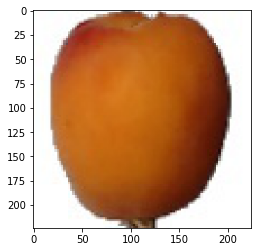

In [ ]:
#Load the image of the Aprocit in the data directory, and take a look at its data vector.
img, x = load_image("101_100.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
#We get class predictions from this model. We forward x through model and then use the built-in decode_predictions to look up the class names.
#Forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

35363/35363 [==============================] - 0s 0us/step
predicted acorn with probability 0.361
predicted bell_pepper with probability 0.156
predicted orange with probability 0.077
predicted spaghetti_squash with probability 0.070
predicted punching_bag with probability 0.034


In [ ]:
#feature_extractor which takes a reference to the desired input and output layers in our VGG16 model. 
#Thus, feature_extractor's output is the layer just before the classification, the last 4096-neuron fully connected layer.
#summary() function the architecture of feat_extractor

feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1/1 [==============================] - 1s 632ms/step


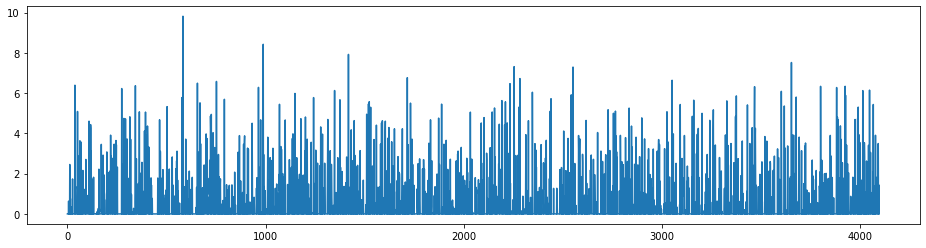

In [ ]:
# The predict function returns an array with one element per image. 
#Each element contains a 4096-element array, which is the activations of the last fully-connected layer fc2 in VGG16.
#Below plot represents the array as well.
img, x = load_image("101_100.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
#Open a folder of images for analysis. 
#First, we will just recursively crawl the folder specified by image_path looking for images of the extensions inside of image_extensions and then limiting them to a random subset of maximum max_num_images images. 

images_path = 'Dataset'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 6938 images to analyze


In [ ]:
#We begin a loop which will open each image, extract its feature vector, and append it to a list called features which will contain our activations for each image
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 522ms/step
analyzing image 2000 / 6938. Time: 495.0532 seconds.
1/1 [==============================] - 1s 532ms/step
analyzing image 2500 / 6938. Time: 505.7707 seconds.
1/1 [==============================] - 1s 566ms/step
analyzing image 3000 / 6938. Time: 507.6678 seconds.
1/1 [==============================] - 1s 534ms/step
analyzing image 3500 / 6938. Time: 510.1718 seconds.
1/1 [==============================] - 1s 547ms/step
analyzing image 4000 / 6938. Time: 513.5669 seconds.
1/1 [==============================] - 1s 556ms/step
analyzing image 4500 / 6938. Time: 509.6507 seconds.
1/1 [==============================] - 1s 541ms/step
analyzing image 5000 / 6938. Time: 508.4344 seconds.
1/1 [==============================] - 1s 570ms/step
analyzing image 5500 / 6938. Time: 505.7100 seconds.
1/1 [==============================] - 1s 564ms/step
analyzing image 6000 / 6938. Time: 506.7247 seco

In [ ]:
#Instantiate a PCA object, which we will then fit our data to, choosing to keep the top 300 principal components.
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)


PCA(n_components=300)

In [ ]:
# take original feature vectors, and transform them to the new space.

pca_features = pca.transform(features)

In [ ]:
#save everything to disk using pickle.
import pickle

pickle.dump([images, pca_features, pca], open('features.p', 'wb'))

In [ ]:
#Open the features and printing the features
infile = open('features.p','rb')
new_dict = pickle.load(infile)
infile.close()

print(new_dict)
print(type(new_dict))

[['/content/Dataset/Validation/Banana/r_48_100.jpg', '/content/Dataset/Validation/Banana/98_100.jpg', '/content/Dataset/Validation/Banana/314_100.jpg', '/content/Dataset/Validation/Banana/r_320_100.jpg', '/content/Dataset/Validation/Banana/29_100.jpg', '/content/Dataset/Validation/Banana/312_100.jpg', '/content/Dataset/Validation/Banana/321_100.jpg', '/content/Dataset/Validation/Banana/r_56_100.jpg', '/content/Dataset/Validation/Banana/r_242_100.jpg', '/content/Dataset/Validation/Banana/r_54_100.jpg', '/content/Dataset/Validation/Banana/r_44_100.jpg', '/content/Dataset/Validation/Banana/311_100.jpg', '/content/Dataset/Validation/Banana/r_233_100.jpg', '/content/Dataset/Validation/Banana/168_100.jpg', '/content/Dataset/Validation/Banana/298_100.jpg', '/content/Dataset/Validation/Banana/102_100.jpg', '/content/Dataset/Validation/Banana/115_100.jpg', '/content/Dataset/Validation/Banana/r_36_100.jpg', '/content/Dataset/Validation/Banana/310_100.jpg', '/content/Dataset/Validation/Banana/r_2

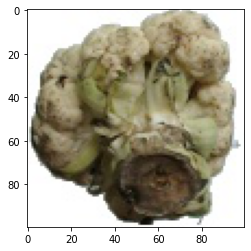

In [ ]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = load_img(images[query_image_idx])
plt.imshow(img)

In [ ]:
# select one image, and then compute a measurement of the dissimilarity (or distance) of that image's PCA feature vector to every other image's feature vector.
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
print(similar_idx)
print(len(similar_idx))
print(max(similar_idx))
print(min(similar_idx))

[1.1008295640349388, 1.054720502346754, 1.1667162626981735, 1.0724764987826347, 1.1900608241558075, 1.192311868071556, 1.1521918326616287, 1.1036458015441895, 1.113504245877266, 1.0980309173464775, 1.1148528158664703, 1.1859306395053864, 1.1083298847079277, 1.133303463459015, 1.1871339678764343, 1.0574790127575397, 1.0402431637048721, 1.1014827117323875, 1.201580673456192, 1.119290053844452, 1.1426846235990524, 1.1499368995428085, 1.1866031289100647, 1.059064108878374, 1.1089884638786316, 1.0562342926859856, 1.097345806658268, 1.0660175904631615, 1.2049560546875, 1.107782207429409, 1.108702391386032, 1.0929112434387207, 1.082424908876419, 1.0923864990472794, 1.1454251855611801, 1.116485707461834, 1.0785227194428444, 1.173216536641121, 1.186983048915863, 1.155338168144226, 1.1119492202997208, 1.1866916865110397, 1.110049583017826, 1.1112865060567856, 1.084968164563179, 1.1003029122948647, 1.0966290012001991, 1.1135465800762177, 1.1718038618564606, 1.1398508101701736, 1.1027710661292076,

In [ ]:
#sort them, and then find the most similar items, and return the indexes 5 most similar images. 
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]


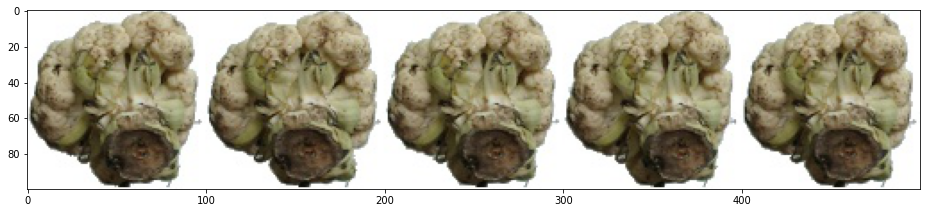

In [ ]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
#function get_closest_images, which will compute the cosine distance between the PCA features of query_image_idx-th image in our dataset, and the PCA features of every image in the dataset 
#function get_concatenated_images which will take resulting images and concatenate them into a single image for easy display.
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'result images')

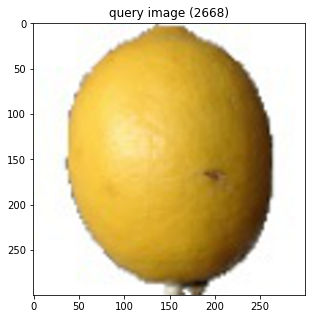

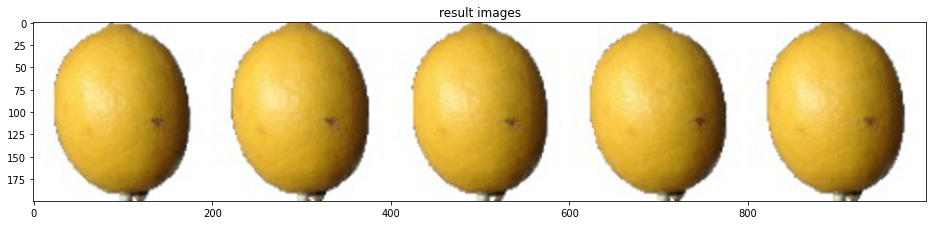

In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'result images')

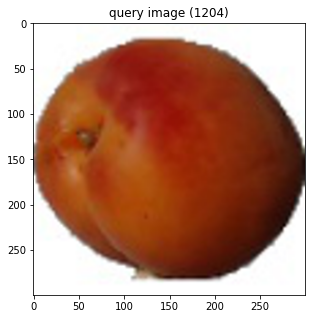

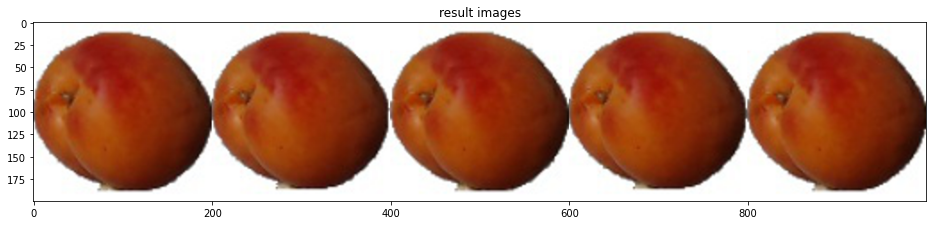

In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

1/1 [==============================] - 1s 551ms/step


Text(0.5, 1.0, 'result images')

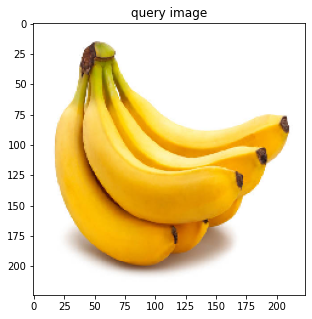

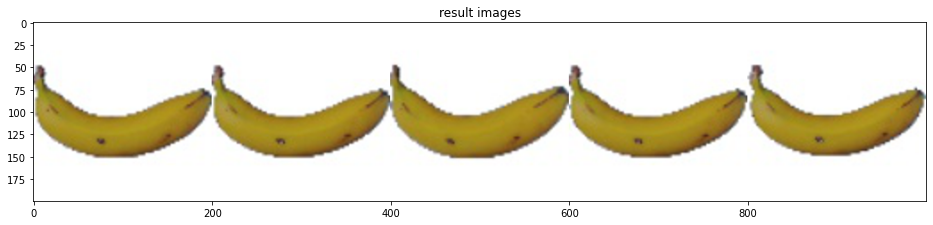

In [ ]:

# load image and extract features
new_image, x = load_image("banana_test.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")